<a href="https://colab.research.google.com/github/relfarizi/Final_Project/blob/master/drugDiscovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

### - Install RDKIT

In [1]:
# Install rdkit

def install_rdkit():
  !wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
  !chmod +x Miniconda3-latest-Linux-x86_64.sh
  !time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
  !time conda install -q -y -c conda-forge rdkit

# install_rdkit()

### - Library

In [2]:
# Data

#from google.colab import files
import pandas as pd
import numpy as np
import regex as re

# rdkit
import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import DataStructs

# random
import random as rd

import math

RDKit WARNING: [09:28:09] Enabling RDKit 2019.09.1 jupyter extensions


## 2. Data

### Pre-Processing Data

In [3]:
def preprocessing_data(link_of_data) :
  dataset = pd.read_csv(link_of_data,sep=";")
  dataset = dataset.iloc[:,[0,7,9,10,11]]

  sameMol = []
  sameMolCount = {}
  dataset_handle = []

  for x in dataset.values:
    mol_name = x[0]
    if mol_name in sameMol:
      print("uye")
      x[0] = mol_name+"("+str(sameMolCount[mol_name])+")"
      sameMolCount[mol_name] += 1
    else:
      sameMol.append(x[0])
      sameMolCount[mol_name] = 1
    dataset_handle.append(x)

  #print(dataset_handle)
    
  list_of_column_dataframe = dataset.columns
  list_of_dataset_after = []

  list_of_dataset_before = np.array(dataset_handle)
  
  for data in list_of_dataset_before :
    if data[2] == "'='" :
      if data[4] == "nM" :
        if data[3] < 10000 :
          data[3] = data[3]/1000
          list_of_dataset_after.append(data)
  
  dataframe_of_dataset_after = pd.DataFrame(list_of_dataset_after)
  dataframe_of_dataset_after.columns = list_of_column_dataframe
  name_of_file_download = "Dataset_After.csv"
  dataframe_of_dataset_after.to_csv(name_of_file_download)
  #files.download(name_of_file_download)
  return dataframe_of_dataset_after

# Run untuk mendapatkan datase setelah preprocessing
#preprocessing_data("https://raw.githubusercontent.com/relfarizi/Final_Project/master/Data/Dataset_Before.csv")

### Data After Pre-Processing

In [4]:
# for colab

#dataset = pd.read_csv('https://raw.githubusercontent.com/relfarizi/Final_Project/master/Data/Dataset_After.csv', index_col= 0)


dataset = pd.read_csv('Dataset_After.csv',index_col = 0)
dataset.head(5)

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL2263120,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,'=',0.7200,nM
1,CHEMBL2263121,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,'=',3.3100,nM
2,CHEMBL168,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',5.0501,nM
3,CHEMBL508831,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.5400,nM
4,CHEMBL506556,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.6200,nM


#### - Fix Missing Value in Smiles

In [5]:
dataset = dataset.dropna()
mol_smiles = dataset.iloc[:,1].values.tolist()
row_drop = []
for i in range(len(mol_smiles)) :
  if len(str(mol_smiles[i])) < 5 :
    row_drop.append(i)
print(row_drop)
dataset.drop(row_drop)

[]


,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL2263120,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,'=',0.7200,nM
1,CHEMBL2263121,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,'=',3.3100,nM
2,CHEMBL168,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',5.0501,nM
3,CHEMBL508831,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.5400,nM
4,CHEMBL506556,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.6200,nM
...,...,...,...,...,...
1855,CHEMBL1782241,CC(C)=CCC/C(C)=C/Cc1c(O)c(CC=C(C)C)c(O)c2c(=O)...,'=',5.2000,nM
1856,CHEMBL323197,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,'=',5.5000,nM
1857,CHEMBL4071698,CCCc1cc(O)cc(OC(=O)c2c(O)cc(O)cc2CCC)c1,'=',0.7200,nM
1858,CHEMBL3770020,CCCc1cc(O)cc(O)c1C(=O)O,'=',1.5800,nM


## 3. Fitur yang digunakan

variabel yang digunakan :
* mol_name = list nama molekul
* mol_smile = list smile molekul
* mol_act = list berisi nilai IC50
* mol_fp = list yang berisi fingerprint dari setiap molekul

In [6]:
mol_name = dataset.iloc[:,0].values.tolist()
mol_smiles = dataset.iloc[:,1].values.tolist()
mol_act = dataset.iloc[:,3].values.tolist()

mol_fp = []
for molekul in mol_smiles :
  smiles = Chem.MolFromSmiles(str(molekul))
  fp = Chem.RDKFingerprint(smiles)
  mol_fp.append(fp)


In [7]:
df = pd.DataFrame({'mol_name':mol_name,
                       'mol_smiles' : mol_smiles,
                       'mol_act':mol_act,
                       'mol_fp' : mol_fp,
                       })

df.head()

,mol_name,mol_smiles,mol_act,mol_fp
0,CHEMBL2263120,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,0.7200,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ..."
1,CHEMBL2263121,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,3.3100,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ..."
2,CHEMBL168,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,5.0501,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ..."
3,CHEMBL508831,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,0.5400,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ..."
4,CHEMBL506556,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,0.6200,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, ..."


In [8]:
df_mol = df.iloc[:,[0,2,3]]
df_mol

,mol_name,mol_act,mol_fp
0,CHEMBL2263120,0.7200,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ..."
1,CHEMBL2263121,3.3100,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ..."
2,CHEMBL168,5.0501,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ..."
3,CHEMBL508831,0.5400,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ..."
4,CHEMBL506556,0.6200,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, ..."
...,...,...,...
1847,CHEMBL1782241,5.2000,"[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, ..."
1848,CHEMBL323197,5.5000,"[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, ..."
1849,CHEMBL4071698,0.7200,"[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1850,CHEMBL3770020,1.5800,"[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."


## 4. Algoritma NSGA II

### Supurt function

#### Display

In [9]:
def dislay(f1,f2,gen,animate=False) :
    plt.title("gen "+str(gen+1))
    plt.xlabel('Diversity', fontsize=15)
    plt.ylabel('Activity', fontsize=15)
    plt.scatter(f2, f1)
    plt.figure(figsize=(15,15))
    plt.show()

#### Cek Duplikat Individu
Melakukan pengecekan terhadap individu yang sama (mempunyai keseluruhan anggota yang sama) dalam suatu populasi

---
Contoh :


```
a = [1,2,3,4,5]
b = [2,3,4,5,7]
c = [1,5,2,3,4]

pop = [a,b,c]

```
Maka :
```
isDupInd(c,pop) ==> True
isDupInd(b,pop) ==> False
```
---





In [10]:
def isDupInd(individu,population,dfMol = df_mol) :
    same = False
    molName = dfMol["mol_name"]
    molNameList = []
    for gen in individu :
        molNameList.append(gen)
    individu = molNameList
    sizeList = len(individu)
    #print(sizeList)
    count = 0
    for ind in population :
        ind = ind[0]
        for gen in individu :
            if gen in ind :
                count += 1
        
        if count == sizeList :
            #print(count)
            #print("masuk")
            same = True
            break
        else :
            count = 0
    return same


#### Sort by Value
Me-return list berupa index dari element yang sudah terurut(descend)

In [11]:
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

In [12]:
import math
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list


In [13]:
def sortByValue(ls) :
    sort = sorted((value,index) for index,value in enumerate(ls))
    sortLs = []
    for x in sort :
        sortLs.append((x[1]))
    return sortLs
#sortByValue(ls)

#### bundling Individu
Menghitung nilai activity dan diversity dari masing - masing Individu

In [14]:
def bundleIndividu(individu,dfMol = df_mol):
    molName = dfMol["mol_name"].tolist()
    molAct = dfMol["mol_act"].tolist()
    molFp = dfMol["mol_fp"].tolist()
 
    fp_list = []
    n = len(molName)

    def fObjective(individu = individu,dfMol = df_mol) :
    
        def fObj1(individu = individu,dfMol = dfMol) :
            act = []
            for idx,x in enumerate(molName) :
                if x  in individu :
                    act.append(dfMol["mol_act"][idx])
            return np.mean(act)
        
        def fObj2(individu = individu, dfMol = dfMol) :
            fpList = []
            molFp = []

            for idx,x in enumerate(molName) :
                if x in individu :
                    molFp.append(dfMol["mol_fp"][idx])
            n = len(molFp)
            for i in range(n):
                for j in range(n):
                    if i > j :
                        tmpFp = DataStructs.FingerprintSimilarity(molFp[i],molFp[j])
                        fpList.append(tmpFp)
            return 1/(np.mean(fpList))

        return fObj1(), fObj2()

    fObj1,fObj2 = fObjective()
    
    if [individu,fObj1,fObj2] is not None :
        return [individu,fObj1,fObj2]
    else :
        return []


#### Extract Individu
mengekstract nilai pada setiap individu yang terdapat pada 1 populasi

In [15]:
def unpackInd(population) :
    fMaxObj1 = []
    fMaxObj2 = []
    solution = []
    for idx,individu in enumerate(population) :
        #print(idx)
        solution.append(individu[0])
        fMaxObj1.append(individu[1]) # Probabilitas Kesuksesan
        fMaxObj2.append(individu[2]) # Diversity   
    return [solution,fMaxObj1,fMaxObj2]

### Inisialisasi populasi

Pada proses ini akan dihasilkan sekumpulan nPortfolio individu (Portfolio). Setiap individu terdiri dari nGen Gen (Molekul)

In [16]:
def initPopulation(nPortfolio,nGen,dfMol=df_mol):
    def initIndividu(dfMol = df_mol,nGen=nGen):
        randIndividu = []
        while(len(randIndividu) < nGen) :
            gen = rd.randint(0,len(dfMol)-1)
            if gen not in randIndividu:
                randIndividu.append(gen)
        return randIndividu

    molName = dfMol["mol_name"].tolist()
    molAct = dfMol["mol_act"].tolist()
    molFp = dfMol["mol_fp"].tolist()
    population = []
    
    nSubset = dfMol.shape[0]

    for i in range(nPortfolio) :
        randIndividu = initIndividu()

        if i > 0 :
            while(isDupInd(randIndividu,population)) :
                randIndividu = initIndividu()

        molNameList = []
        for j in randIndividu :
            molNameList.append(molName[j])     
        individu = molNameList
        bInd = bundleIndividu(individu)
        population.append(bInd)
    return population

### Generate Offspring ( crossover and mutation )
Pada proses ini akan dihasilkan sekumpulan individu sebanyak 2 kali lipat dari populasi sebelumnya. Untuk mendapatkannya dilakukan :

*   Crossover
*   Mutation

Hal yang harus dihindari : Pengulangan individu yang sama dalam 1 populasi baru



In [17]:
def generateOffspring(population,dfMol = df_mol) :
    sizeOfPop = len(population)

    def duplicateMol(parent) :
        parent1,parent2 = parent
        dupGen = []
        for gen in parent1 :
            if gen in parent2 :
                dupGen.append(gen)
        return dupGen

    def generateParent(population=population, sizeOfPop = sizeOfPop):
        parent1 = population[rd.randint(0,sizeOfPop-1)][0]
        parent2 = population[rd.randint(0,sizeOfPop-1)][0]
        return [parent1,parent2]

    def crossover(parent,pCo = 0.5) :
       
        randCo = rd.random()
        parents = generateParent()
        parent1,parent2 = (parents)
        dupMol = ((duplicateMol(parents)))
        parent1 = list(set(parent1)-set(dupMol))
        parent2 = list(set(parent2)-set(dupMol))
        nGen = len(parent1)
        
        nPoint = 0.5
        barier = math.floor(nGen*nPoint) 

        if randCo < pCo :
            offspring1 = parent1[:barier]+parent2[barier:]
            offspring2 = parent2[:barier]+parent1[barier:]
        else :
            offspring1 = parent1
            offspring2 = parent2
        offspring1 += dupMol
        offspring2 += dupMol
        return ([offspring1,offspring2])

   # Flip mutation 
    def mutation(individu,pMut = 0.2,pMr = 0.5,dfMol = dfMol) :
        randMut = rd.uniform(0,1)
        newOffspring = []
        if randMut > pMut :
            newInd = []
            molName = [mol for mol in dfMol["mol_name"] if mol not in individu]
            for idx,gen in enumerate(individu) :
                randRep = rd.uniform(0,1)
                if randRep > pMr :
                    newMol = rd.choice(molName)
                    while(newMol in individu) :
                        individu[idx] = rd.choice(molName)


        return individu



    
    # Start Generate
    solution = []
    while(len(solution) < 2*sizeOfPop):
        parents = generateParent()
        offSpring = crossover(parents)
        for x in offSpring :
            if len(solution) > 0 :
                if not isDupInd(x,solution) :
                    solution.append(bundleIndividu(mutation(x),dfMol))
                else :
                    continue
            else :
                 solution.append(bundleIndividu(mutation(x),dfMol))
    return solution


### Non-Dominated Sorted

Proses Sorting berdasarkan prinsip non dominance antar fungsi

In [18]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front



### Crowding Distance
Untuk meng-eliminasi beberapa individu yang mempunyai perfomansi sama

In [19]:
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])

    sorted2 = sort_by_values(front, values2[:])
    
    distance[0] = math.inf
    distance[len(front) - 1] = math.inf
    for k in range(1,len(front)-1):

        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
        
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

### Main Program

Start


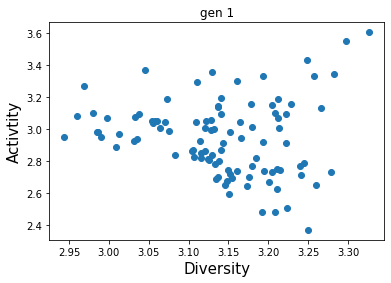

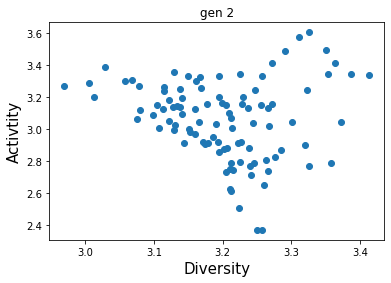

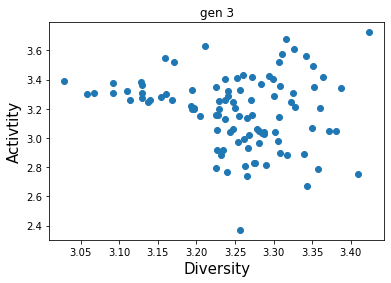

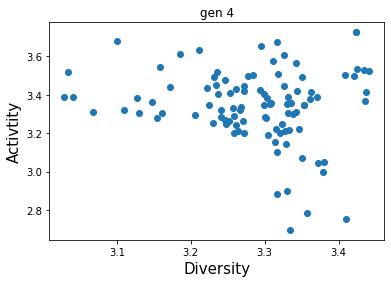

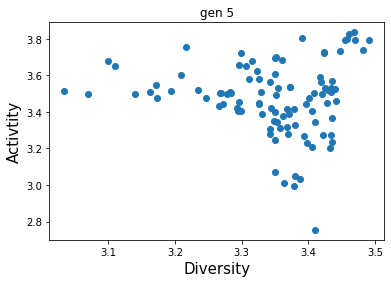

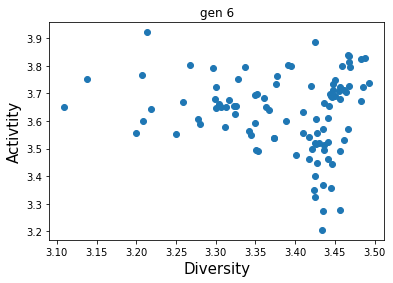

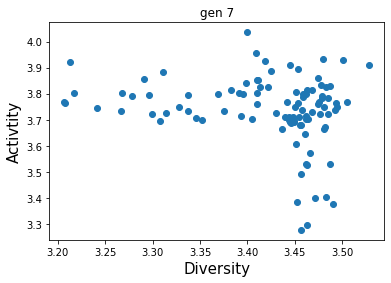

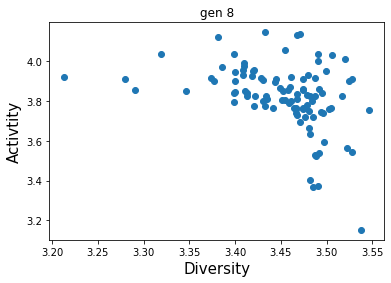

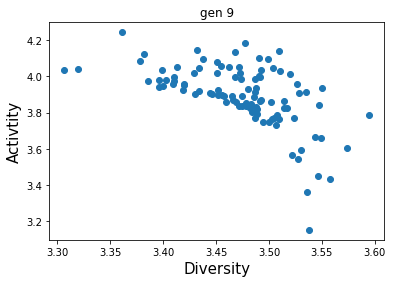

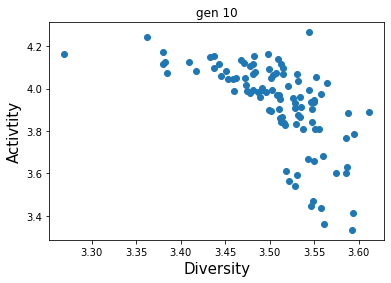

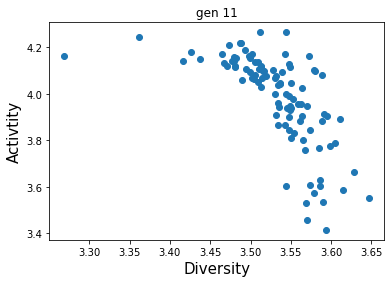

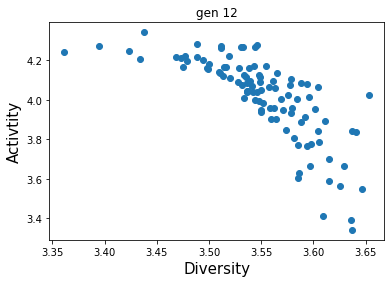

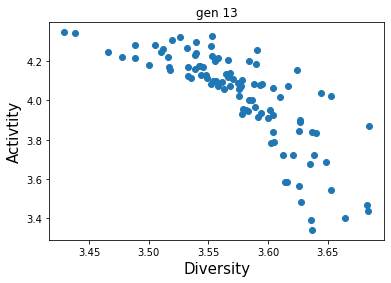

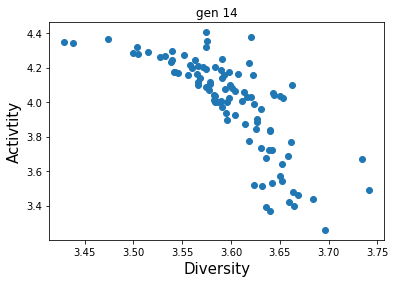

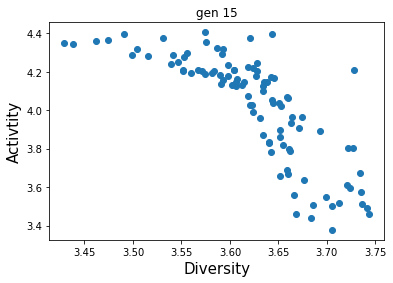

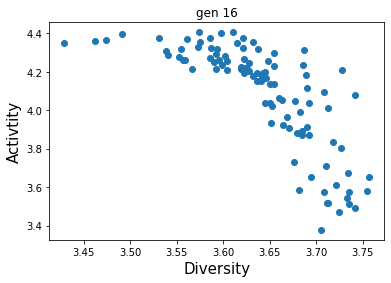

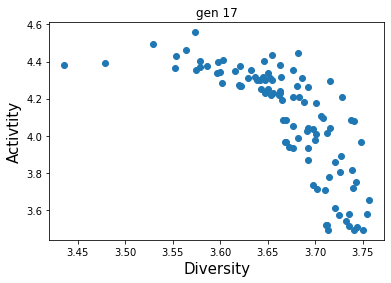

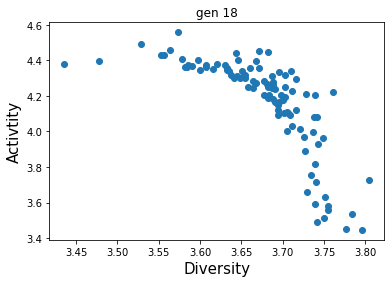

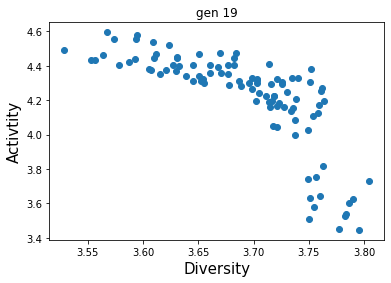

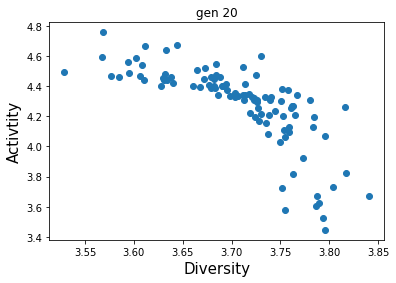

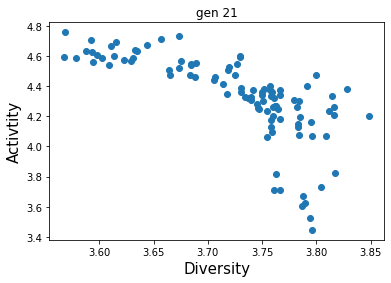

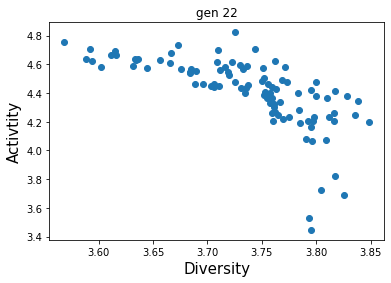

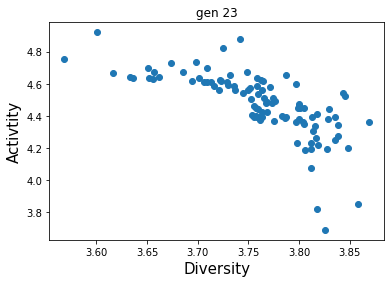

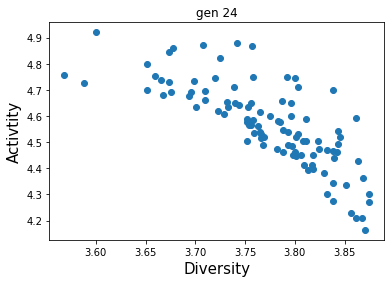

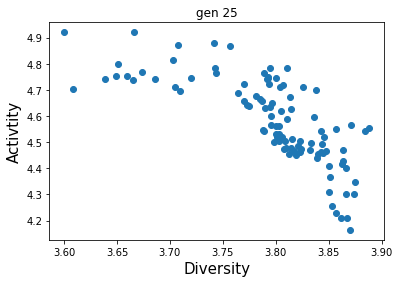

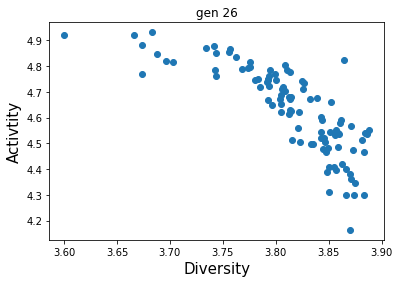

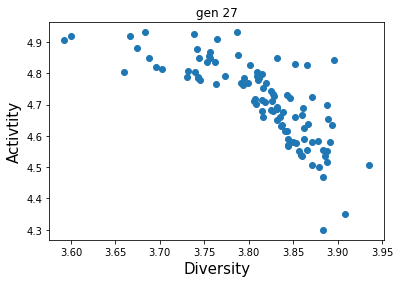

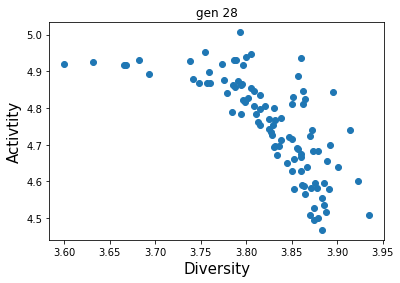

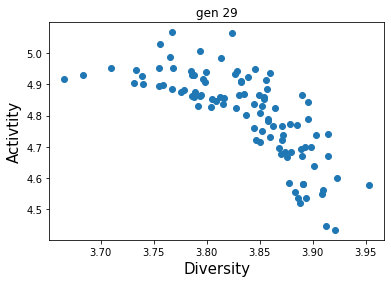

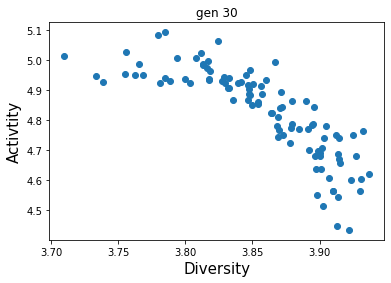

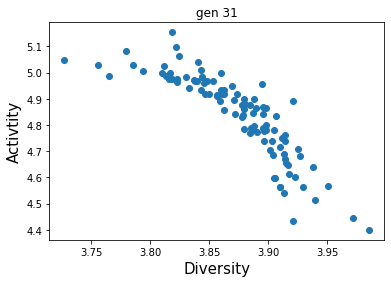

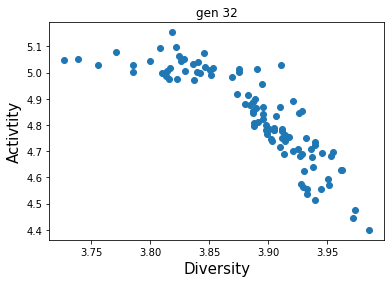

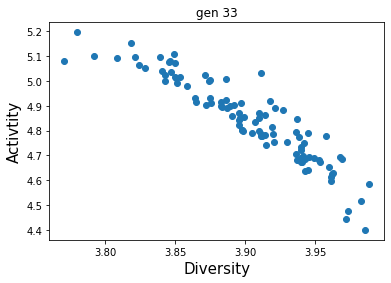

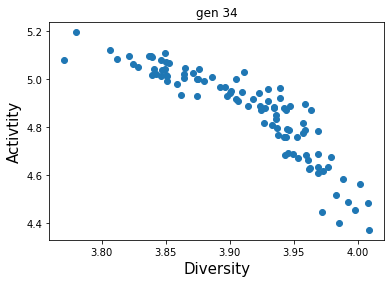

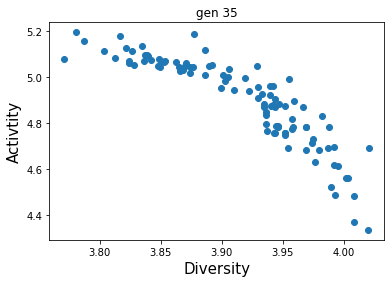

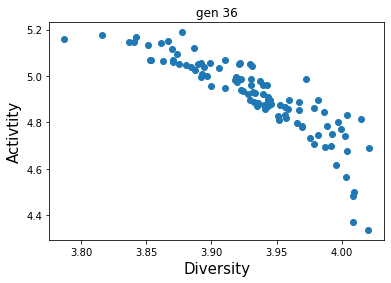

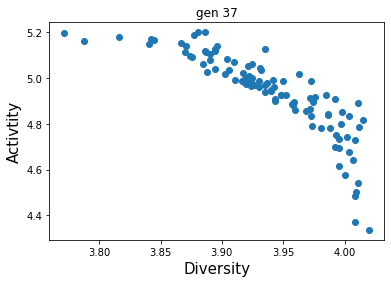

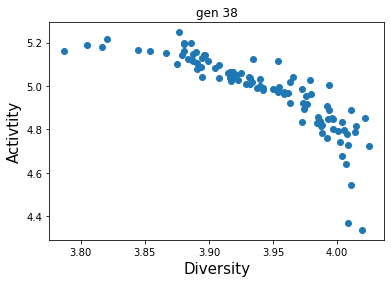

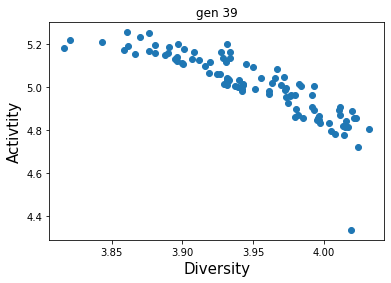

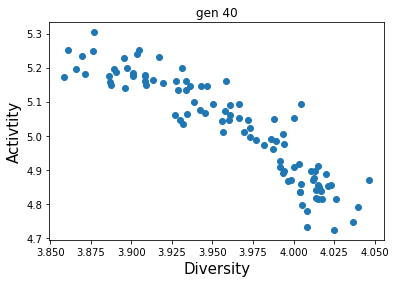

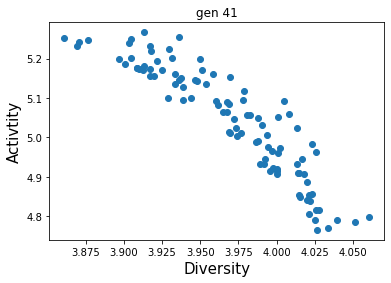

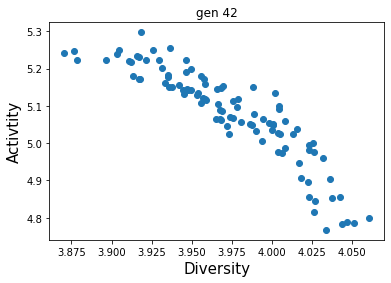

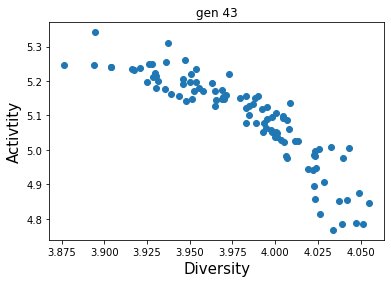

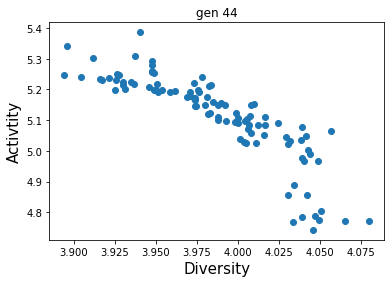

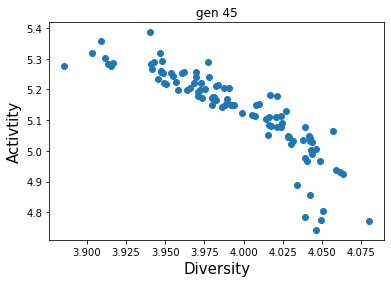

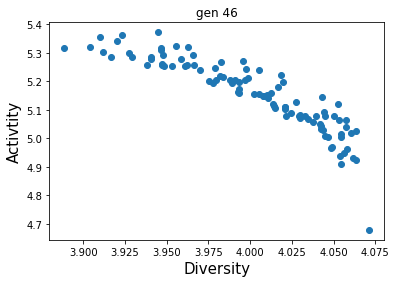

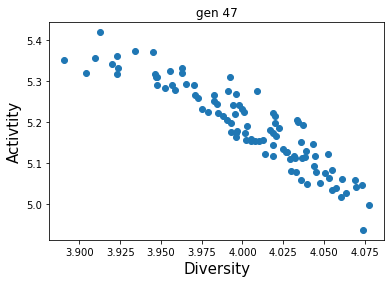

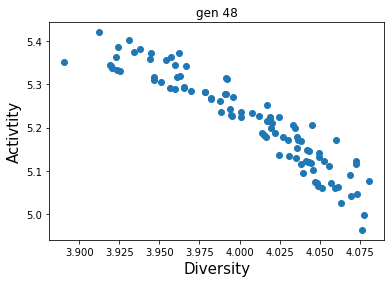

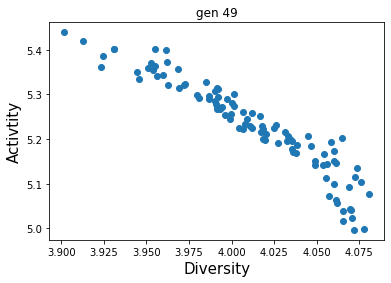

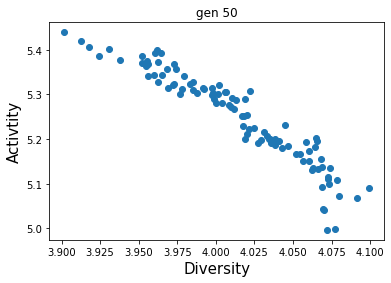

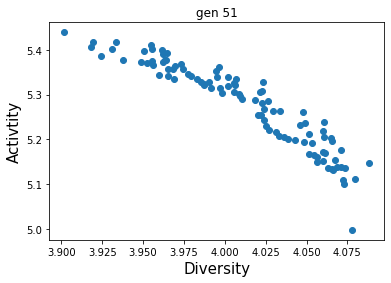

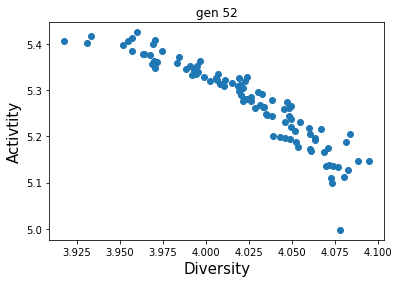

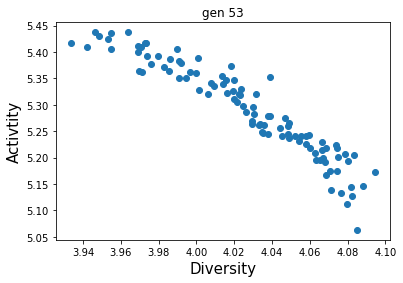

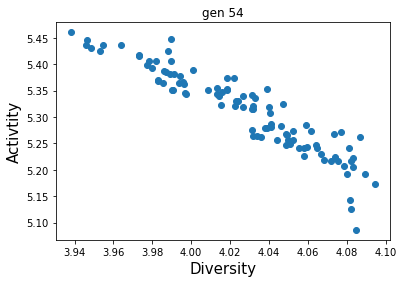

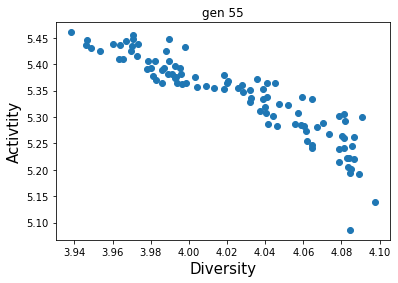

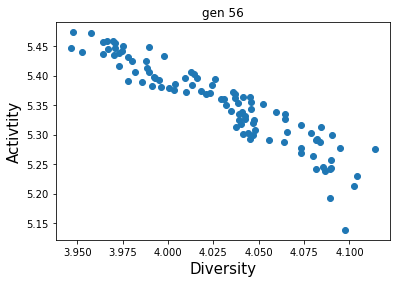

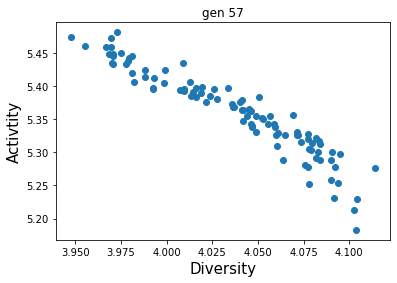

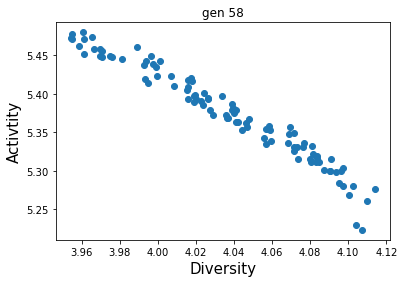

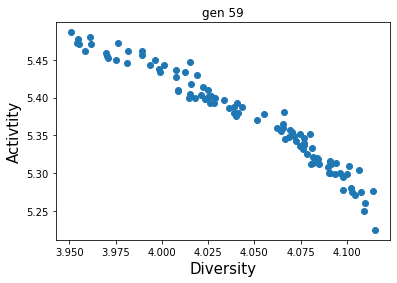

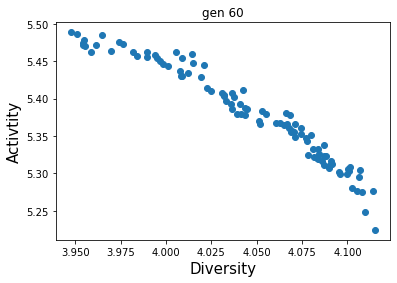

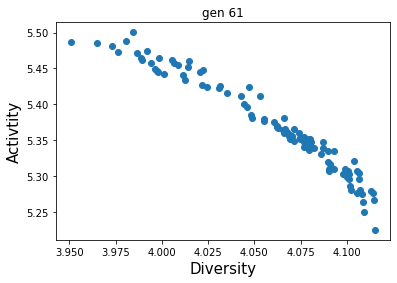

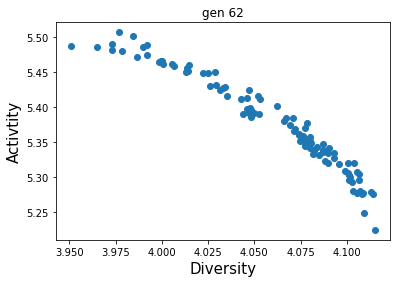

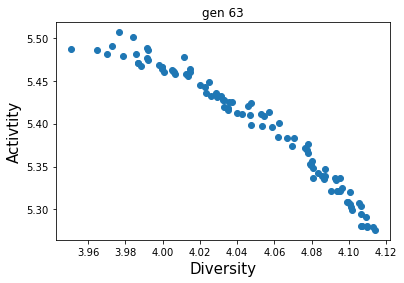

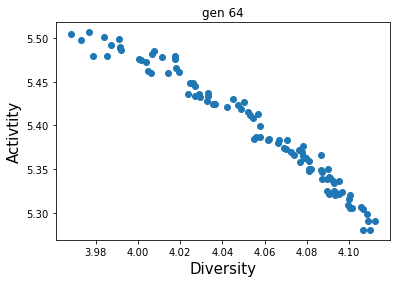

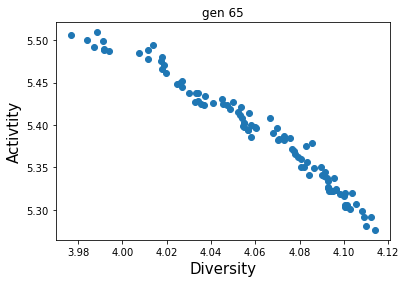

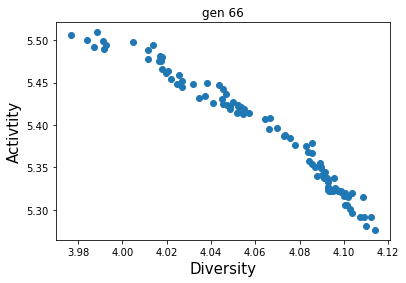

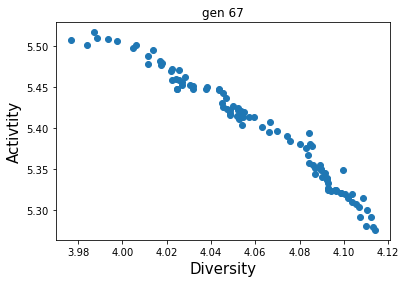

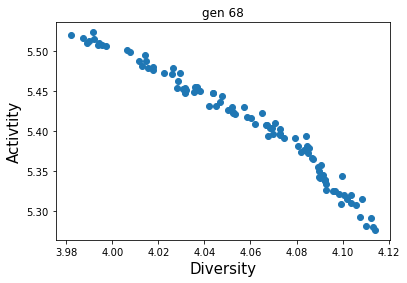

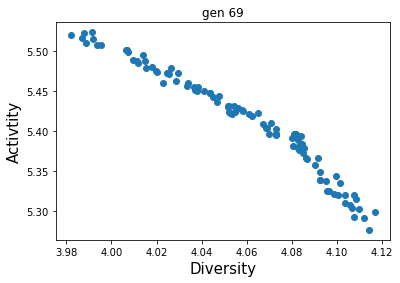

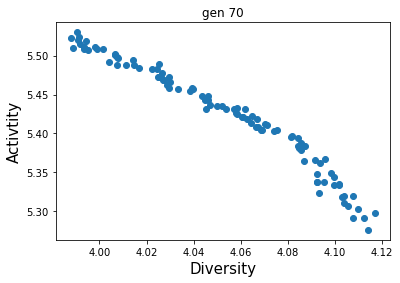

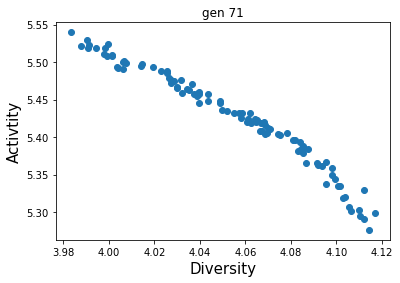

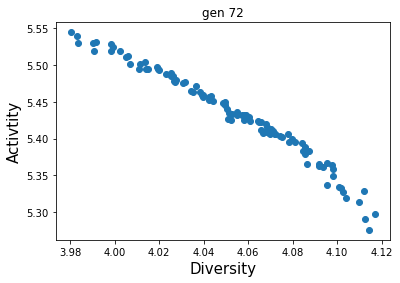

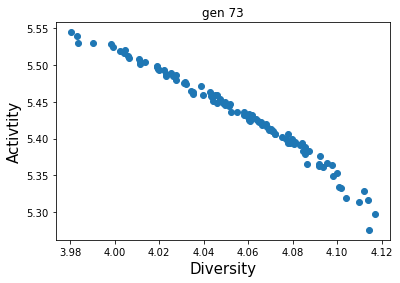

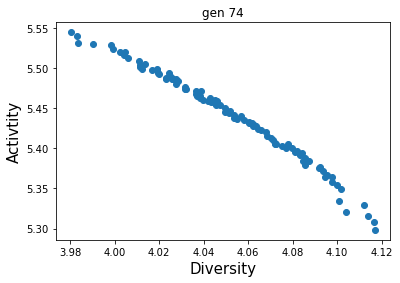

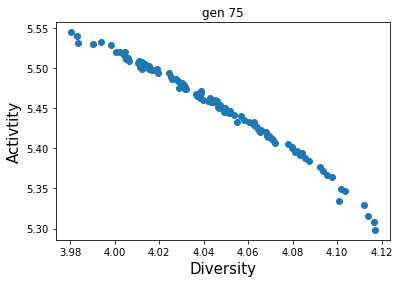

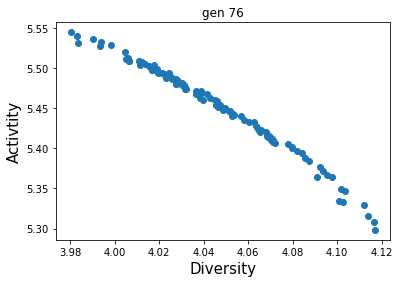

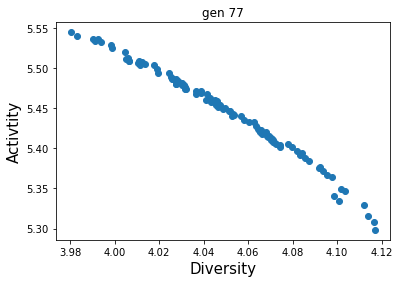

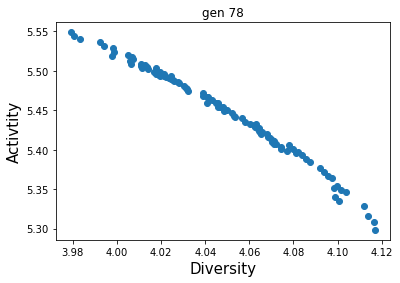

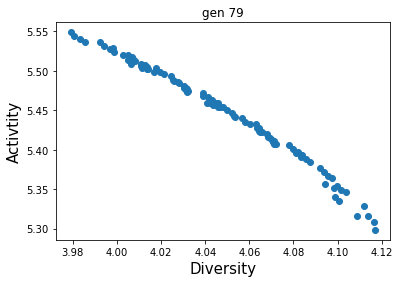

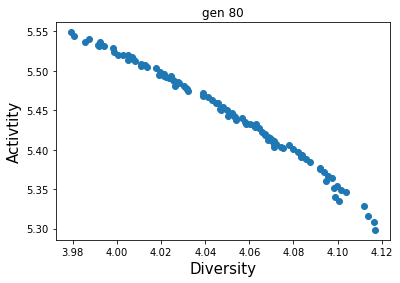

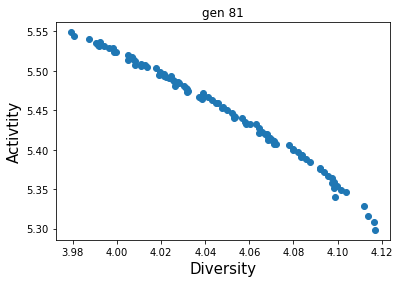

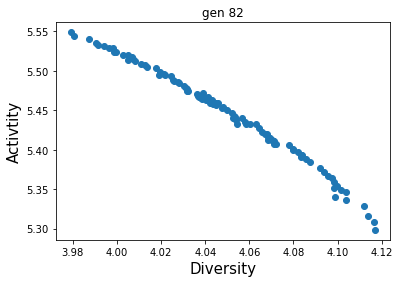

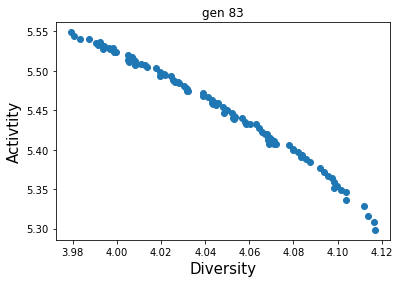

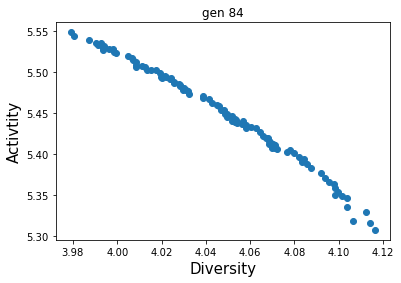

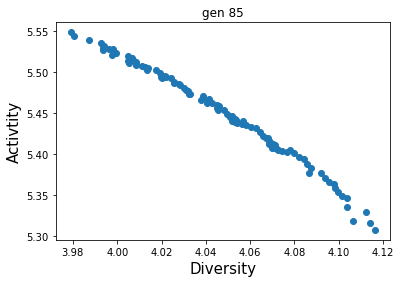

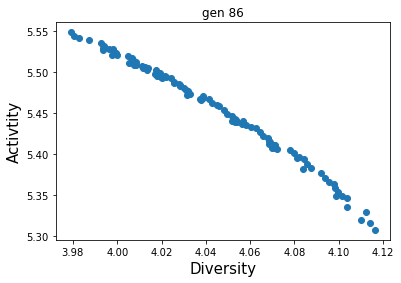

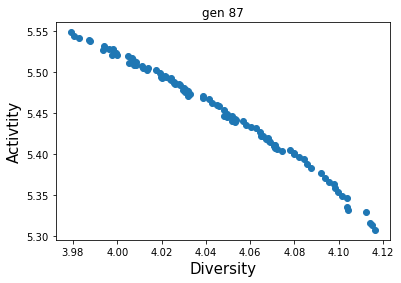

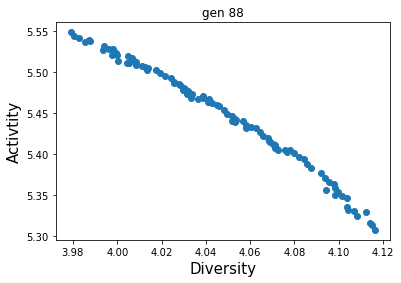

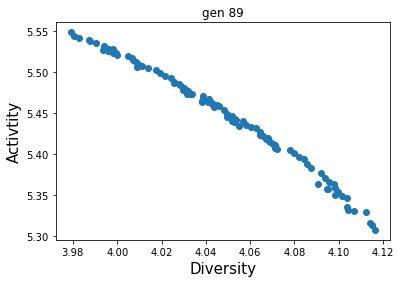

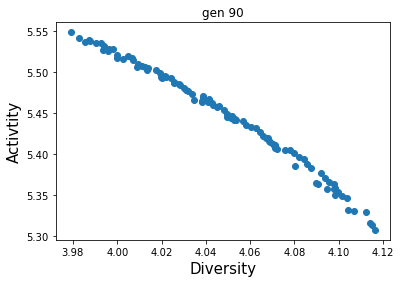

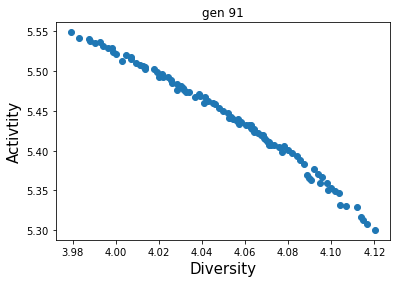

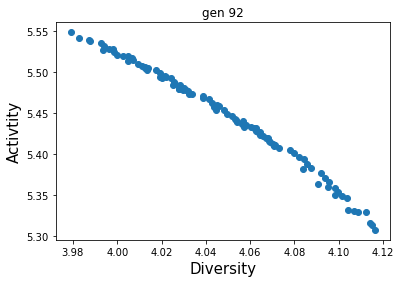

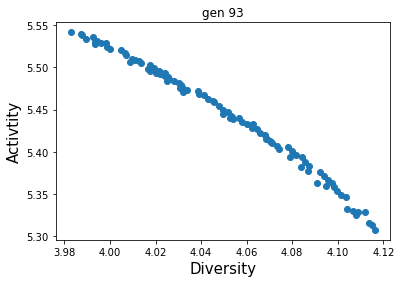

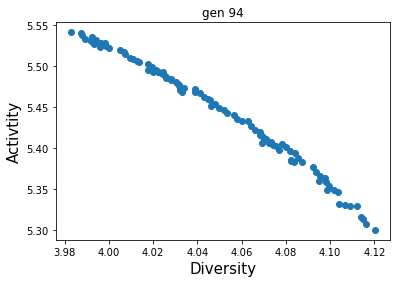

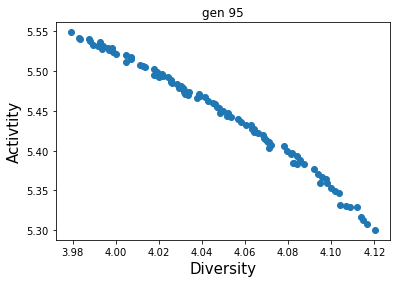

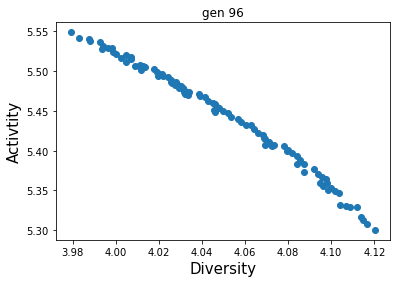

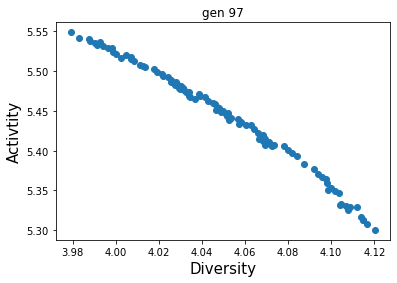

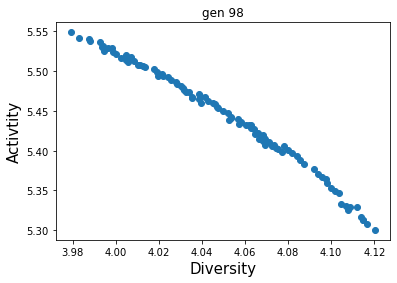

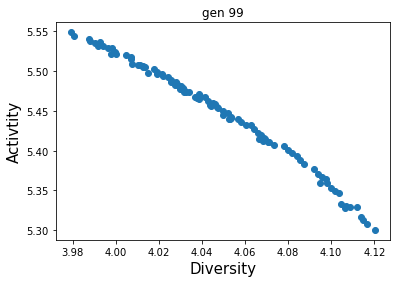

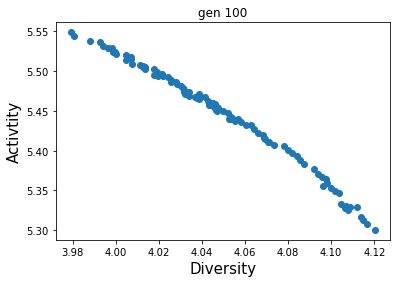

In [20]:
# Parameter
import matplotlib.pyplot as plt
maxGen = 100
gen_0 = 0
nGen = 100
nPortfolio = 100 # banyaknya individu dalam satu populasi


# Step 1 Generate Population
population = initPopulation(nPortfolio,nGen)
initFobj1 = unpackInd(population)[1]
initFobj2 = unpackInd(population)[2]

print("Start")
for gen in range(maxGen) :
    #print("gen ", gen+1, "Start!")

    # Step 2 Generate Offsprings
   
    offsprings = generateOffspring(population)
    fObj1 = unpackInd(offsprings)[1]
    fObj2 = unpackInd(offsprings)[2]
    
    # Step 3 Fast Non Dominated
    nonDominatedSorted = fast_non_dominated_sort(fObj1[:],fObj2[:])
    
    # Step 4 crowding distance
    crowdingDistance = []
    for i in range(len(nonDominatedSorted)) :
        crowdingDistance.append(crowding_distance(fObj1[:],fObj2[:],nonDominatedSorted[i][:]))
    

    # Step 5 Individu selection
    newNonDominatedSorted = []
    new_solution = []

    for i in range(0,len(nonDominatedSorted)):  

        # step 5.1 assign sort by index dari crowding distance

        front22 = sortByValue(crowdingDistance[i][:])
        if gen == 1 :
            cSave = crowdingDistance[i][:]
            fSave = front22

        # step 5.2 memasukkan nilai dari non_dominated .. berdasrkan urutan crowding

        front = []
        for j in range(len(nonDominatedSorted[i])):
            front.append(nonDominatedSorted[i][front22[j]])

        # Step 5.3 masukin ke new_sol sesuai dengan keperluan pop_size

        for value in front:
            new_solution.append(value)
            
            if(len(new_solution)==nPortfolio):
                break
                
        if (len(new_solution) == nPortfolio):
            break
    
    population = [offsprings[i] for i in new_solution]

    maxFObj1 = unpackInd(population)[1]
    maxFObj2 = unpackInd(population)[2]

    plt.title("gen "+str(gen+1))
    plt.xlabel('Diversity', fontsize=15)
    plt.ylabel('Activtity', fontsize=15)
    plt.scatter(maxFObj2, maxFObj1)
    
    plt.show()
    #clear_output(wait=True)
    

    

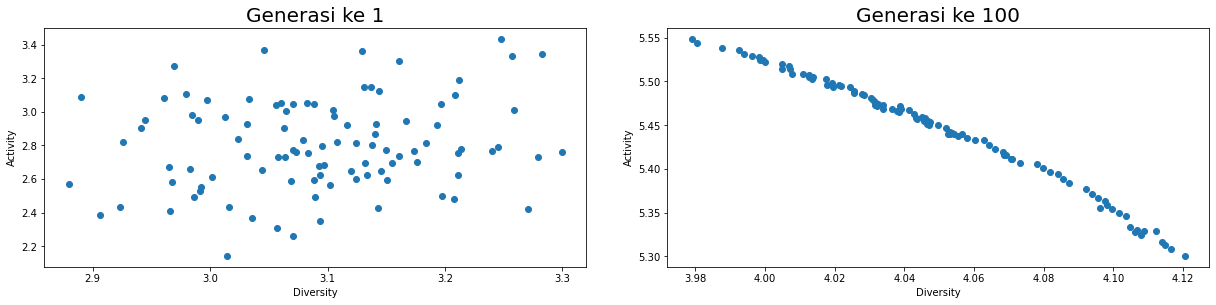

In [22]:
f1 = [initFobj1,maxFObj1]
f2 = [initFobj2,maxFObj2]
title = ["Generasi ke 1","Generasi ke "+str(maxGen)]
n = len(f1)
fig, ax = plt.subplots(ncols=n,figsize=(18,5))
fig.tight_layout(pad=5.0)
for i in range(n) :
    ax[i].scatter(f2[i],f1[i])
    ax[i].set(xlabel="Diversity",ylabel="Activity")
    ax[i].set_title(title[i],fontsize=20)

plt.show()